In [3]:
import pandas as pd
import string
import re
import ast
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [4]:
df1= pd.read_csv("Grab SG Restaurants_2.csv")

In [5]:
df1.shape

(16136, 19)

In [6]:
df1 = df1.drop_duplicates()

In [7]:
#filter only Grab food related
df1=df1.loc[df1['loc_type']=='FOOD']

In [8]:
df1['promo'] = df1['promo'].apply(lambda x: 'yes promo'if not pd.isnull(x) else 'no promo')


In [9]:
#replace promo blank space with no promo and fill empty currency rows
#df1['promo']=df1['promo'].fillna('No promo')
df1['currency']=df1['currency'].fillna('SGD')

In [10]:
df1['delivery_cost']=df1['delivery_cost'].apply(lambda c: c/100)

In [11]:
#count number of cuisine per restaurant
df1['cuisine_count']= df1['cuisine'].apply(lambda x: len(str(x).split(',')))

In [12]:
df1=  df1.dropna(subset=['reviews_nr','rating','cuisine','name','delivery_time','delivery_cost']) #remove rows with empty rating and reviews

In [13]:
df1= df1.drop(['image_url','id_source'], axis=1)

In [14]:
df1['location']= df1['address'].apply(lambda x: str(x).split(' - ')[-1])

In [15]:
df1['cuisine'] = df1['cuisine'].apply(lambda x: ast.literal_eval(x))

In [16]:
df1.shape

(11900, 19)

In [17]:
df1.head()

,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,cuisine_count,location
0,Texas Chicken,Texas Chicken - VivoCity,Singapore,"[Western, Fast Food, Halal, Chicken, Beverages]",SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,43.0,5,VivoCity
1,Subway,Subway - Vivocity,Singapore,"[Healthy, Sandwiches, Fast Food, Halal, Western]",SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,4.2,197.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,42.0,5,Vivocity
2,LiHO Tea,LiHO Tea - Vivo City,Singapore,"[Same Prices In-Store, Beverages, Local, Bubbl...",SGD,5.6,1.264309,103.821369,"{""open"": true, ""displayedHours"": ""11:30-20:45""...",5000,4.5,353.0,DELIVERY_TAKEAWAY,yes promo,FOOD,GRAB,41.0,4,Vivo City
3,Wingstop,Wingstop - VivoCity,Singapore,"[Halal, Chicken, Fast Food, Burger, Western]",SGD,5.6,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,4.4,1391.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,45.0,5,VivoCity
4,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,Singapore,"[Japanese, Ramen, Noodles, Asian]",SGD,5.7,1.264810,103.822554,"{""open"": true, ""displayedHours"": ""10:30-21:00""...",5000,4.6,309.0,DELIVERY_TAKEAWAY,yes promo,FOOD,GRAB,44.0,4,Vivocity


In [43]:
df1 = df1[(df1['delivery_options'] == 'ONLY_DELIVERY') 
          & (df1['delivery_by'] == 'GRAB')
          & (df1['reviews_nr'] > 20)]

In [44]:
df1.head()

,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,cuisine_count,location
0,Texas Chicken,Texas Chicken - VivoCity,Singapore,"[Western, Fast Food, Halal, Chicken, Beverages]",SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,43.0,5,VivoCity
1,Subway,Subway - Vivocity,Singapore,"[Healthy, Sandwiches, Fast Food, Halal, Western]",SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,4.2,197.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,42.0,5,Vivocity
3,Wingstop,Wingstop - VivoCity,Singapore,"[Halal, Chicken, Fast Food, Burger, Western]",SGD,5.6,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,4.4,1391.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,45.0,5,VivoCity
6,Burger King,Burger King - VivoCity,Singapore,"[American, Burger, Halal]",SGD,5.6,1.263741,103.821354,"{""open"": true, ""displayedHours"": ""09:00-21:45""...",5000,4.1,389.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,41.0,3,VivoCity
12,Ayam Penyet President,Ayam Penyet President - Vivocity,Singapore,"[Halal, Local, Chicken, Same Prices In-Store]",SGD,5.7,1.264905,103.822693,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,4.5,1027.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,42.0,4,Vivocity


In [45]:
df2 = df1.explode('cuisine')

In [46]:
df2 = df2.reset_index(drop=True)

In [47]:
df2.head()

,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,cuisine_count,location
0,Texas Chicken,Texas Chicken - VivoCity,Singapore,Western,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,43.0,5,VivoCity
1,Texas Chicken,Texas Chicken - VivoCity,Singapore,Fast Food,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,43.0,5,VivoCity
2,Texas Chicken,Texas Chicken - VivoCity,Singapore,Halal,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,43.0,5,VivoCity
3,Texas Chicken,Texas Chicken - VivoCity,Singapore,Chicken,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,43.0,5,VivoCity
4,Texas Chicken,Texas Chicken - VivoCity,Singapore,Beverages,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,yes promo,FOOD,GRAB,43.0,5,VivoCity


In [48]:
df1.columns[df1.isnull().any()].tolist()


[]

In [55]:
df_3 = df1[['cuisine_count','promo','rating','delivery_cost','radius','delivery_time']]

In [56]:
df_used = pd.get_dummies(df_3)
df_used.columns

Index(['cuisine_count', 'rating', 'delivery_cost', 'radius', 'delivery_time',
       'promo_no promo', 'promo_yes promo'],
      dtype='object')

In [57]:
df_used.head(2).append(df_used.tail(2))

C:\Users\86150\AppData\Local\Temp\ipykernel_16404\3661735764.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_used.head(2).append(df_used.tail(2))


,cuisine_count,rating,delivery_cost,radius,delivery_time,promo_no promo,promo_yes promo
0,5,3.8,5.7,5000,43.0,0,1
1,5,4.2,5.7,3000,42.0,0,1
16104,2,4.7,17.8,5000,28.0,1,0
16110,4,4.4,2.9,2500,20.0,0,1


In [58]:
plt.figure(figsize=(20, 25))
sns.set(font_scale=0.6)

<Figure size 2000x2500 with 0 Axes>

In [59]:
corr_matrix = df_used.corr()



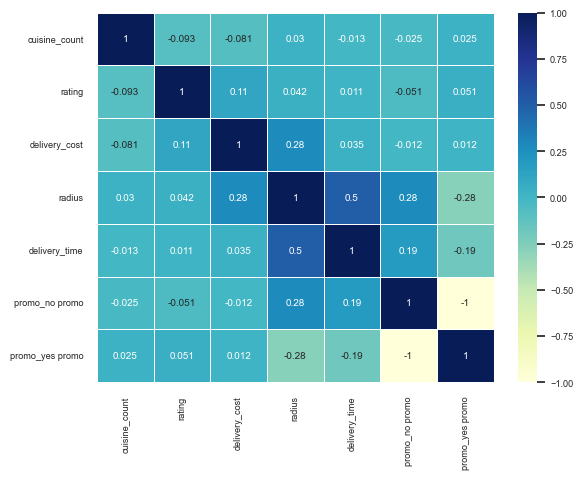

In [60]:
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, linewidth=.5)
plt.show()

In [64]:
df_4 = df1[['cuisine_count','promo','rating','delivery_cost','radius','delivery_time']]

In [65]:
df_used2 = pd.get_dummies(df_4)
df_used2.columns

Index(['cuisine_count', 'rating', 'delivery_cost', 'radius', 'delivery_time',
       'promo_no promo', 'promo_yes promo'],
      dtype='object')

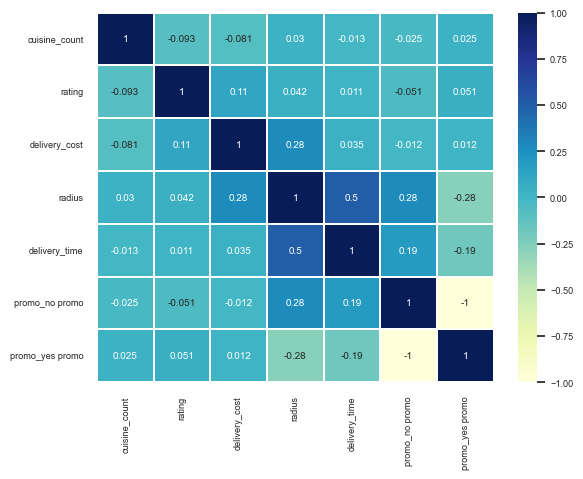

In [66]:
corr_matrix2 = df_used2.corr()
dataplot = sns.heatmap(corr_matrix2, cmap="YlGnBu", annot=True, linewidth=.3)
plt.show()

In [67]:
df_4.head()

,cuisine_count,promo,rating,delivery_cost,radius,delivery_time
0,5,yes promo,3.8,5.7,5000,43.0
1,5,yes promo,4.2,5.7,3000,42.0
3,5,yes promo,4.4,5.6,5000,45.0
6,3,yes promo,4.1,5.6,5000,41.0
12,4,yes promo,4.5,5.7,5000,42.0


In [68]:
import pandas as pd

df_4.to_csv('New_dataset.csv', index=False)